<a href="https://colab.research.google.com/github/stavkol/Unemployment/blob/main/Unempoyment_Sex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

In [2]:
!pip install ppscore

In [3]:
import pandas as pd
import numpy as np
import pycaret
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

Το σύνολο δεδομένων δημιουργήθηκε από τον ιστότοπο https://www.mockaroo.com

In [4]:
url = 'https://raw.githubusercontent/stavkol/Unemployment/main/Unemployment_Sex.csv'


In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/stavkol/Unemployment/main/Unemployment_Sex.csv") # Correct the typo in the URL

In [6]:
pps.score(df, "sex", "unemployment")

{'x': 'sex',
 'y': 'unemployment',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.476,
 'model_score': 0.4935345765103618,
 'model': DecisionTreeRegressor()}

In [7]:
matrix = pps.matrix(df)

In [11]:
matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,unemployment,unemployment,1.00000,predict_itself,True,None,0.000,1.000000,None
1,unemployment,sex,0.09203,classification,True,weighted F1,0.412,0.466113,DecisionTreeClassifier()
2,sex,unemployment,0.00000,regression,True,mean absolute error,0.476,0.493535,DecisionTreeRegressor()
3,sex,sex,1.00000,predict_itself,True,None,0.000,1.000000,None


from matplotlib import pyplot as plt
matrix['ppscore'].plot(kind='hist', bins=20, title='ppscore')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
matrix['baseline_score'].plot(kind='hist', bins=20, title='baseline_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
matrix['model_score'].plot(kind='hist', bins=20, title='model_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
matrix.groupby('x').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
matrix.groupby('y').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
matrix.groupby('case').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
matrix.groupby('metric').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
matrix.plot(kind='scatter', x='ppscore', y='baseline_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
matrix.plot(kind='scatter', x='baseline_score', y='model_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
matrix['ppscore'].plot(kind='line', figsize=(8, 4), title='ppscore')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
matrix['baseline_score'].plot(kind='line', figsize=(8, 4), title='baseline_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
matrix['model_score'].plot(kind='line', figsize=(8, 4), title='model_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['y'].value_counts()
    for x_label, grp in matrix.groupby('x')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('x')
_ = plt.ylabel('y')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['case'].value_counts()
    for x_label, grp in matrix.groupby('y')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('y')
_ = plt.ylabel('case')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['metric'].value_counts()
    for x_label, grp in matrix.groupby('case')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('case')
_ = plt.ylabel('metric')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['model'].value_counts()
    for x_label, grp in matrix.groupby('metric')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('metric')
_ = plt.ylabel('model')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(matrix['x'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(matrix, x='ppscore', y='x', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(matrix['y'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(matrix, x='ppscore', y='y', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(matrix['case'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(matrix, x='ppscore', y='case', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(matrix['metric'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(matrix, x='ppscore', y='metric', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

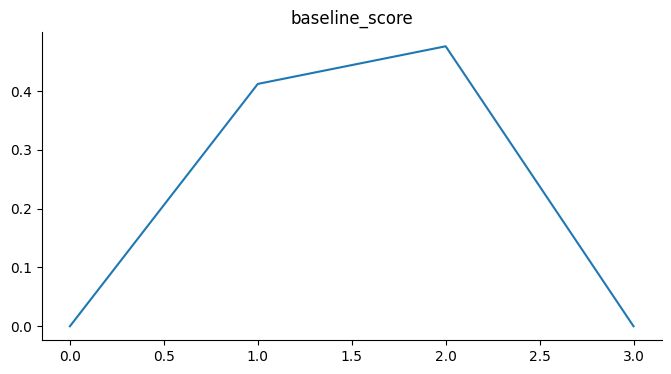

In [14]:
# @title baseline_score

from matplotlib import pyplot as plt
matrix['baseline_score'].plot(kind='line', figsize=(8, 4), title='baseline_score')
plt.gca().spines[['top', 'right']].set_visible(False)

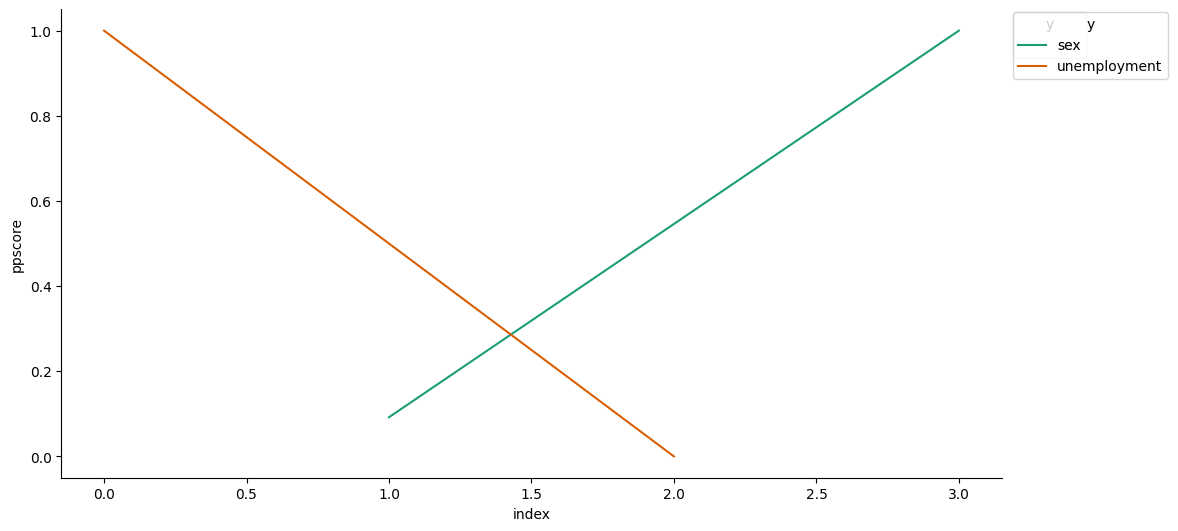

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['ppscore']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('y')):
  _plot_series(series, series_name, i)
  fig.legend(title='y', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('ppscore')

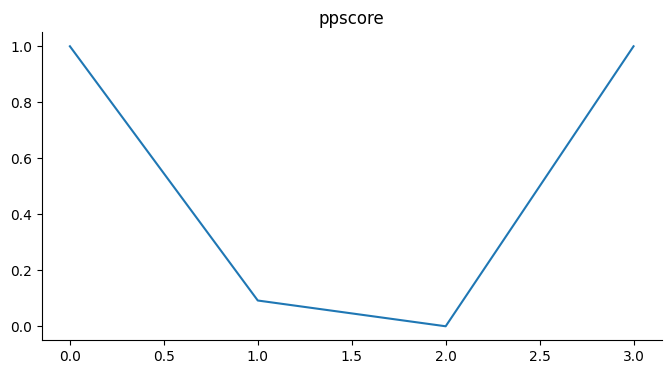

In [9]:
# @title ppscore

from matplotlib import pyplot as plt
matrix['ppscore'].plot(kind='line', figsize=(8, 4), title='ppscore')
plt.gca().spines[['top', 'right']].set_visible(False)

*Επιλογή χαρακτηριστικών με το ppsore*.Μπορούμε να χρησιμοποιήσουμε το pps για να βρούμε καλούς προγνωστικούς παράγοντες για την στήλη στόχο.Επίσης μπορούμε να εξαλείψουμε λειτουργίες που απλώς προσθέτουν τυχαίο θόρυβο.Αυτές οι λειτουργίες μερικές φορές εξακολουθούν να έχουν υψηλή βαθμολογία στις μετρήσεις σημασίας χαρακτηριστικών.Επιπλέον,μπορούμε να να εξαλείψουμε λειτουργίες που μπορούν να προβλεθούν από άλλες,επειδή δεν προσθέτουν νέες πληροφορίες.Επιπλέον, μπορούμε να προσδιορίσουμε ζεύγη αμοιβαία προγνωστικών χαρακτηριστικών στον πίνακα pps.Αυτός μπορεί να περιλαμβάνει χαρακτηριστικά έντονα συσχετισμένα καθώς και μη γραμμικές συσχετίσεις.